### 결측치와 이상치 처리 방법
- 제거 : 결측치나 이상치를 가진 데이터를 제거한다.
- 제거를 하게 되면 데이터의 왜곡이 발생하지는 않지만 데이터 양이 줄어든다.
- 대체 : 결측치나 이상치를 다른 값으로 바꾸는 것을 의미한다.
- 대체를 하게 되면 데이터의 양이 줄어들지는 않지만 왜곡이 발생한다.
- 제거를 추천. 다만 제거 후 너무 많이 줄어든다라고 생각이 든다면 대체할 값을 찾아야 한다.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 결측치 확인

In [5]:
df1 = pd.read_csv('data/data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [6]:
# 데이터 프레임의 요약 정보를 확인해 결측치가 있는 컬럼을 확인한다.
# n entries : n개의 행이 존재한다는 의미
# non-null count : 결측치를 제외한 데이터의 개수
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 철수 to 호영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학년      5 non-null      int64  
 1   성별      5 non-null      object 
 2   국어      5 non-null      int64  
 3   영어      4 non-null      float64
 4   수학      3 non-null      float64
 5   과학      4 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 280.0+ bytes


In [8]:
# 통계 함수를 이용한 결측치 확인
# 전체 로우의 개수를 파악한다.
a1 = len(df1)
# 결측치를 제외한 데이터의 개수를 구한다.
a2 = df1.count()

print(f'전체 로우의 개수 : {a1}')
print(f'결측치를 제외한 각 컬럼별 데이터의 개수')
display(a2)

전체 로우의 개수 : 5
결측치를 제외한 각 컬럼별 데이터의 개수


학년    5
성별    5
국어    5
영어    4
수학    3
과학    4
dtype: int64

In [10]:
# 결측치를 제외한 데이터의 개수를 전체 행의 개수로 뺀다.
# 전체 행의 개수
a1 = len(df1)
# 각 컬럼별 결측치를 제외한 데이터의 개수
a2 = df1.count()

# 전체 행의 개수에서 각 컬럼 별 결측치를 제외한 데이터의 개수를 뺀다.
a3 = a1 - a2
a3 

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

In [11]:
# notna 함수 사용
# 각 컬럼별 결측치가 아닌 데이터의 개수를 파악할 수 있다.
# notna 함수 : 결측치가 아닌 값은  True, 결측치인 부분은 False 로 환산한 데이터 프레임을 반환한다.
# 이 후에 sum 함수로 계산하면 True는 1, False는 0으로 취급해 합산한다.
df1.notna().sum()

학년    5
성별    5
국어    5
영어    4
수학    3
과학    4
dtype: int64

In [12]:
# isna 함수 : 결측치인 부분은 True, 결측치가 아닌 부분은 False로 되어 있는 결과를 반환한다.
df1.isna().sum()

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

### 결측치 제거
- inplace를 제공한다.

In [13]:
df1 = pd.read_csv('data/data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [14]:
# 결측치가 포함된 모든 행을 제거한다.
df2 = df1.copy()

display(df2)

df2.dropna(inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [15]:
# 컬럼을 지정하여 그 컬럼들에 결측치가 있는 행들을 제거한다.
df2 = df1.copy()
display(df2)

df2.dropna(inplace= True, subset = ['수학', '과학'])
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [18]:
df2 = df1.copy()
df2.loc['길동'] = [np.nan, np.nan,np.nan,np.nan,np.nan,np.nan]
display(df2)

df2.dropna(inplace = True, how = 'all')
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0
길동,NaN,NaN,NaN,NaN,NaN,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


### 결측치가 포함된 열을 제거

In [19]:
# 결측치가 있는 모든 컬럼을 삭제한다.
df2 = df1.copy()
display(df2)
df2.dropna(inplace = True, axis = 1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [21]:
# 인덱스를 지정하여 결측치가 있는 컬럼을 삭제한다.
df2 = df1.copy()
display(df2)
df2.dropna(inplace = True, axis = 1, subset = ['민수', '호영'])
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어
이름,,,,
철수,1,남자,98,NaN
영희,2,여자,88,90.0
민수,1,남자,92,70.0
수현,3,여자,63,60.0
호영,4,남자,120,50.0


### 결측치 대체
- inplace 지원

In [23]:
# 모든 결측치에 값을 채워준다.
df2 = df1.copy()

display(df2)

df2.fillna(value=50, inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


In [24]:
# 컬럼별로 결측치를 채워준다.
# 데이터프레임[컬럼명] 형태로 하면 새로운 series에 값을 채우는 것이지만 원본 데이터 프레임에도 반영시켜준다.
df2 = df1.copy()

display(df2)

df2['영어'].fillna(value = 50, inplace = True)
df2['수학'].fillna(value = 60, inplace = True)
df2['과학'].fillna(value = 70, inplace = True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_19240\292475935.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['영어'].fillna(value = 50, inplace = True)
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_19240\292475935.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


### 이상치
- 정상 범위를 벗어나는 값
- 사회 통념상 상식적인 값으로 판단
- 극단치는 이상치일 가능성이 있다.
- 반드시 데이터 명세서를 확인해야 한다.
- 정상적인 범위라는 것은 데이터 명세서에 있는 범위를 의미하는 것이다. 

In [25]:
df1 = pd.read_csv('data/data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [26]:
# 범위형 데이터의 경우 요약통계정보에서 min과 max를 찾아본다. 
a1 = df1[['국어' , '영어', '수학', '과학']].describe()
a1.loc[['min', 'max']]

,국어,영어,수학,과학
min,63.0,50.0,31.0,64.0
max,120.0,90.0,88.0,88.0


In [27]:
# 직접 통계값을 구한다.
df1[['국어', '영어', '수학', '과학']].agg(['min', 'max'])

,국어,영어,수학,과학
min,63,50.0,31.0,64.0
max,120,90.0,88.0,88.0


In [28]:
# 범주형 데이터
# 각 컬럼별로 어떠한 값들이 저장되어 있는지 확인한다.
display(df1['학년'].value_counts().index)
display(df1['성별'].value_counts().index)

Index([1, 2, 3, 4], dtype='int64', name='학년')

Index(['남자', '여자'], dtype='object', name='성별')

In [29]:
# unique 함수를 사용하면 중복된 값을 제외하고 저장되어 있는 값을 가지고 올 수 있다.
display(df1['학년'].unique())
display(df1['성별'].unique())

array([1, 2, 3, 4], dtype=int64)

array(['남자', '여자'], dtype=object)

In [30]:
df2 = df1.copy()

df2['지역'] = ['서울', '서울', np.nan, '부산', '부산']

# unique는 결측치가 있을 경우 결과에 포함된다.
display(df2['지역'].value_counts().index)
display(df2['지역'].unique())

Index(['서울', '부산'], dtype='object', name='지역')

array(['서울', nan, '부산'], dtype=object)

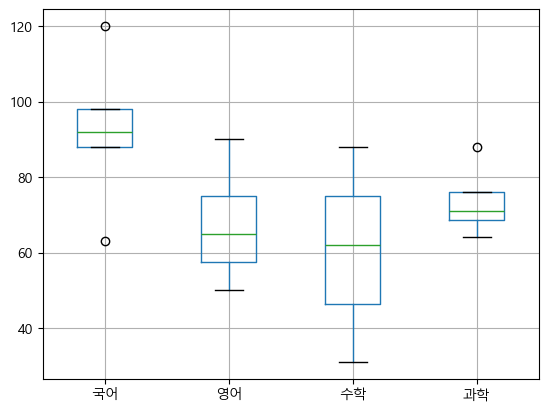

In [33]:
# boxplot을 이용하면 극단치 존재 여부를 확인할 수 있다.
plt.rcParams['font.family'] = 'Malgun Gothic'
df1[['국어', '영어', '수학', '과학']].boxplot()
plt.show()

![boxplot](data/image/1.png)

### IQR
- interquartile range(사분위 범위)
- IQR = Q3 - Q1
- 극단치 최소 경계 = Q1 - (1.5 * IQR)
- 극단치 최대 경계 = Q3 + (1.5 * IQR)

In [36]:
# Q1(25% 위치 값)과 Q3(75% 위치값)을 구한다.
Q1 = df1['국어'].quantile(q=0.25)
Q3 = df1['국어'].quantile(q=0.75)

display(Q1, Q3)

88.0

98.0

In [38]:
# IRQ 값을 구한다
IQR = Q3 - Q1
IQR

10.0

In [40]:
# 극단치 최소 경계를 구한다.
outlier_min = Q1 - (1.5 * IQR)
# 극단치 최대 경계를 구한다.
outlier_max = Q3 + (1.5 * IQR)

display(outlier_min, outlier_max)

73.0

113.0

In [44]:
# 극단치에 해당하는 데이터들을 가져온다.
a1 = df1.query('국어 < @outlier_min or 국어 > @outlier_max ')
a1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 이상치 처리
- 결측치 처럼 제거하거나 채워주거나 하는 함수는 없다.
- 이상치라고 판단되는 데이터를 직접 찾아서 처리해줘야 한다.

In [45]:
# 정상 범위에서 벗어나는 데이터를 가져온다.
# 점수 컬럼의 정상 범위는 0 ~ 100까지라고 가정한다.
df2 = df1.copy()

# 이상치라고 판단되는 행의 index를 가져온다.
idx = df2.query('국어 < 0 or 국어 > 100').index

# idx에 해당하는 행들을 모두 제거한다.
df2.drop(idx, inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0


In [46]:
# 다른 값으로 대체
df2 = df1.copy()

df2.loc[idx, '국어'] = 100

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,100,50.0,NaN,88.0
